In [1]:
import sys
sys.path.append('../../')

import torch as tc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib.patches import FancyBboxPatch, Rectangle

from rcgp.rcgp import IMQ_and_gradient

In [2]:
ymin, ymax = -10, 10
Y = tc.linspace(ymin, ymax, 1000)
m = tc.zeros_like(Y)
imq_out, imq_grad_out = IMQ_and_gradient(Y=Y, m=m, beta=1, c=1)

Text(0, 0.5, '$w_{\\tiny \\textrm{IMQ}}$')

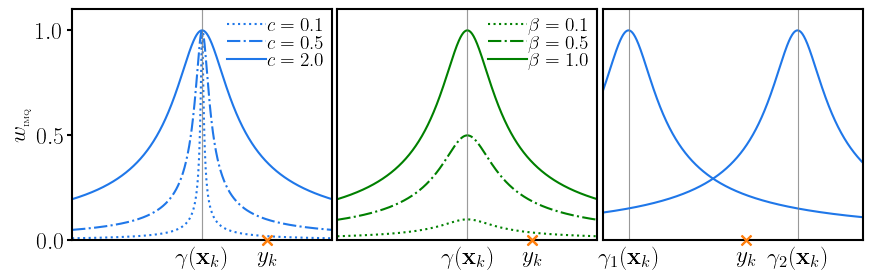

In [3]:
plt.rc('font', family='serif', size=17)
plt.rcParams['text.usetex'] = True
matplotlib.rcParams['lines.linewidth'] = 1.5

lcolor, xcolor = "#1f77e9", "#ff7f0e"

vline_alpha=0.4
vline_wdith = 0.8

fig, axs = plt.subplots(1, 3, figsize=(10.2,3), sharey=True)

#First plot
for c_val, linestyle in zip([0.1, 0.5, 2.], ['dotted', '-.', '-']):
    imq_out, imq_grad_out = IMQ_and_gradient(Y=Y, m=m, beta=1, c=c_val)
    axs[0].plot(Y, imq_out, linestyle=linestyle, color=lcolor, label=r"$c={}$".format(c_val))
    axs[0].vlines(x=0, ymin=0, ymax=1.1, color='gray', alpha=vline_alpha, linewidth=vline_wdith)
    axs[0].scatter([5], [0], marker='x', s=50, color=xcolor, alpha=1., clip_on=False, zorder=100)

for i in [0,1]: axs[i].set_xticks([-10, -5, 0, 5, 10])

labels = [item.get_text() for item in axs[0].get_xticklabels()]

for i in range(len(labels)): labels[i] = ''

labels[2] = r'$\gamma(\mathbf{x}_k)$'
labels[3] = r'$y_k$'

axs[0].set_xticklabels(labels)
axs[0].tick_params(bottom=False, pad=0.2)

axs[0].tick_params(axis='y', which='major', pad=2.)

#Third Plot
for beta_val, linestyle in zip([0.1, 0.5, 1.], ['dotted', '-.', '-']):
    imq_out, imq_grad_out = IMQ_and_gradient(Y=Y, m=m, beta=beta_val, c=2.0)
    axs[1].plot(Y, imq_out, linestyle=linestyle, color="green", label=r"$\beta={}$".format(beta_val))
    axs[1].vlines(x=0, ymin=0, ymax=1.1, color='gray', alpha=vline_alpha, linewidth=vline_wdith)
    axs[1].scatter([5], [0], marker='x', s=50, color=xcolor, alpha=1., clip_on=False, zorder=100)


axs[1].set_xticklabels(labels)
axs[1].tick_params(bottom=False, pad=0.2)


#Third plot
for offset, linestyle in zip([-8., 5.], ['-', '-']):
    imq_out, imq_grad_out = IMQ_and_gradient(Y=Y, m=m + tc.tensor(offset), beta=1.0, c=2.0)
    axs[2].plot(Y, imq_out, linestyle=linestyle, color=lcolor)
    axs[2].vlines(x=offset, ymin=0, ymax=1.1, color='gray', alpha=2*vline_alpha, linewidth=vline_wdith)
    axs[2].scatter([1], [0], marker='x', s=50, color=xcolor, alpha=1., clip_on=False, zorder=100)
    #axs[2].legend(ncols=1, fontsize=8, frameon=False)

axs[2].set_xticks([-10, -8, -1, 0, 1, 5, 10])

labels = [item.get_text() for item in axs[2].get_xticklabels()]
for i in range(len(labels)): labels[i] = ''

labels[1] = r'$\gamma_1(\mathbf{x}_k)$'
labels[5] = r'$\gamma_2(\mathbf{x}_k)$'
labels[4] = r'$y_k$'

axs[2].set_xticklabels(labels)
axs[2].tick_params(bottom=False, pad=0.2)



for ax in axs:
    ax.set_xlim(ymin, ymax)
    ax.set_ylim(0., 1.1)

for ax in axs.flat:
    # Set linewidth for all spines of each axis
    for spine in ax.spines.values():
        spine.set_linewidth(1.5) 
    ax.tick_params(width=1.5)

fig.subplots_adjust(wspace=0.02)

for ax in axs[1:]:
    ax.tick_params(left=False)

axs[0].legend(loc="upper right", ncols=1, fontsize=14, frameon=False, borderaxespad=-0.01, handletextpad=0.05, labelspacing=0.)
axs[1].legend(loc="upper right", ncols=1, fontsize=14, frameon=False, borderaxespad=-0.01, handletextpad=0.05, labelspacing=0.)

#axs[0].legend(loc="upper center", bbox_to_anchor=(0.5, -0.3), ncols=1, fontsize=14, frameon=False, handletextpad=0.1, labelspacing=0.)
#axs[1].legend(loc="upper center", bbox_to_anchor=(1.2, -0.3), ncol=1, fontsize=14, frameon=False)


axs[0].set_ylabel(r"$w_{\tiny \textrm{IMQ}}$")
#fig.savefig("./varying-params-IMQ-weight-fct.pdf", format='pdf', bbox_inches='tight')

In [4]:
Y[np.argwhere((Y < -2.05) & (Y > -1.95))]

tensor([], size=(1, 0))

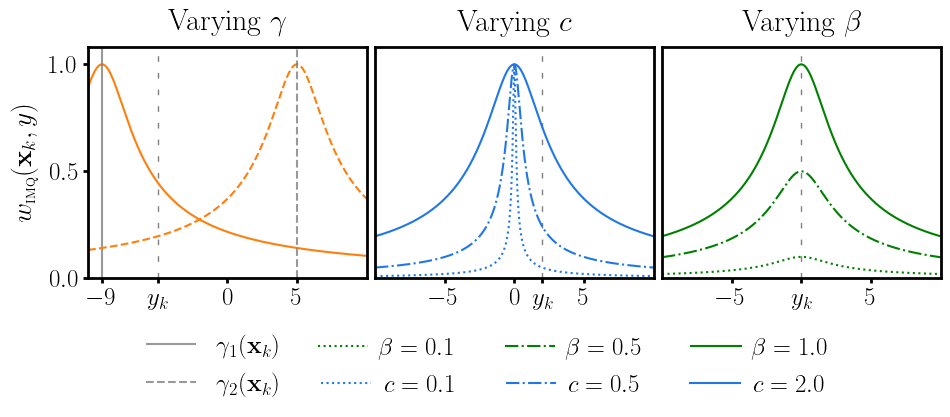

In [ ]:
plt.rc('font', family='serif', size=18)
plt.rcParams['text.usetex'] = True
matplotlib.rcParams['lines.linewidth'] = 1.5

lcolor, xcolor = "#1f77e9", "#ff7f0e"

vline_alpha=0.4
vline_wdith = 1.5
wmin, wmax=0, 1.08

fig, axs = plt.subplots(1, 3, figsize=(11,3), sharey=True)

#First plot
for offset, linestyle, sub in zip([-9., 5.], ['-', '--'], [1, 2]):
    imq_out, imq_grad_out = IMQ_and_gradient(Y=Y, m=m + tc.tensor(offset), beta=1.0, c=2.0)
    axs[0].plot(Y, imq_out, linestyle=linestyle, color=xcolor)

    if sub==1:
        label=r'$\gamma_{1}(\mathbf{x}_k)$'
    else:
        label=r'$\gamma_{2}(\mathbf{x}_k)$'

    axs[0].vlines(x=offset, ymin=wmin, ymax=wmax, linestyle=linestyle, color='gray', alpha=2*vline_alpha, linewidth=vline_wdith, label=label)
    #axs[0].scatter([-5], [0], marker='x', s=50, color='red', alpha=0.5, clip_on=False, zorder=100)
    if sub==1:
        axs[0].vlines(x=-5, ymin=wmin, ymax=wmax, color='black', alpha=0.5, linestyle=(0, (4, 8)), linewidth=1.)

    #axs[2].legend(ncols=1, fontsize=8, frameon=False)

axs[0].set_xticks([-9, -5, 0, 5])

labels = [item.get_text() for item in axs[0].get_xticklabels()]
#for i in range(len(labels)): labels[i] = ''

#labels[0] = r'$\gamma_1(\mathbf{x}_k)$'
#labels[1] = -9
#labels[2] = 0
#labels[3] = r'$\gamma_2(\mathbf{x}_k)$'
labels[1] = r'$y_k$'

axs[0].set_xticklabels(labels)
#axs[0].tick_params(bottom=False, pad=0.2)


#Second plot
for c_val, linestyle in zip([0.1, 0.5, 2.], ['dotted', '-.', '-']):
    imq_out, imq_grad_out = IMQ_and_gradient(Y=Y, m=m, beta=1, c=c_val)
    axs[1].plot(Y, imq_out, linestyle=linestyle, color=lcolor, label=r"$c={}$".format(c_val))
    #axs[1].vlines(x=0, ymin=0, ymax=1.1, color='gray', alpha=vline_alpha, linewidth=vline_wdith)
    #axs[1].scatter([5], [0], marker='x', s=50, color='black', alpha=1., clip_on=False, zorder=100)
    if c_val==0.1:
        axs[1].vlines(x=2, ymin=wmin, ymax=wmax, color='black', alpha=0.5, linestyle=(0, (4, 8)), linewidth=1.)

        #axs[1].vlines(x=2, ymin=wmin, ymax=wmax, color='red', alpha=0.5, linewidth=0.7)


axs[1].set_xticks([-5, 0, 2, 5])

labels = [item.get_text() for item in axs[1].get_xticklabels()]
labels[2] = r'$y_k$'

axs[1].set_xticklabels(labels)



#Third Plot
for beta_val, linestyle in zip([0.1, 0.5, 1.], ['dotted', '-.', '-']):
    imq_out, imq_grad_out = IMQ_and_gradient(Y=Y, m=m, beta=beta_val, c=2.0)
    axs[2].plot(Y, imq_out, linestyle=linestyle, color="green", label=r"$\beta={}$".format(beta_val))
    #axs[2].vlines(x=0, ymin=0, ymax=1.1, color='gray', alpha=vline_alpha, linewidth=vline_wdith)
    #axs[2].scatter([5], [0], marker='x', s=50, color='black', alpha=1., clip_on=False, zorder=100)

    if beta_val==0.1:
        #axs[2].vlines(x=0, ymin=wmin, ymax=wmax, color='red', alpha=0.5, linewidth=0.7)
        axs[2].vlines(x=0, ymin=wmin, ymax=wmax, color='black', alpha=0.5, linestyle=(0, (4, 8)), linewidth=1.)



axs[2].set_xticks([-5, 0, 5])

labels = [item.get_text() for item in axs[2].get_xticklabels()]
labels[1] = r'$y_k$'
axs[2].set_xticklabels(labels)


for ax in axs:
    ax.set_xlim(ymin, ymax)
    ax.set_ylim(wmin, wmax)

for ax in axs.flat:
    # Set linewidth for all spines of each axis
    for spine in ax.spines.values():
        spine.set_linewidth(2.) 
    ax.tick_params(width=2.)

fig.subplots_adjust(wspace=0.03)

for ax in axs[1:]:
    ax.tick_params(left=False)


"""box = Rectangle(
    (0.145, -0.283),             # Lower-left corner (x, y)
    0.7, 0.25,               # Width and height
    facecolor="none",
    edgecolor="black",
    alpha=0.3,
    transform=fig.transFigure,
    zorder=0,
)
fig.patches.append(box)
"""

#axs[1].legend(loc="upper right", ncols=1, fontsize=14, frameon=False, borderaxespad=-0.01, handletextpad=0.05, labelspacing=0.05)
#axs[2].legend(loc="upper right", ncols=1, fontsize=14, frameon=False, borderaxespad=-0.01, handletextpad=0.05, labelspacing=0.05)

axs[0].legend(loc="upper center", bbox_to_anchor=(0.45, -0.225+0.08), ncols=1, fontsize=18, frameon=False)
axs[1].legend(loc="upper center", bbox_to_anchor=(0.71, -0.4+0.08), ncols=3, fontsize=18, frameon=False, labelspacing=-0.9, handletextpad=0.5) #blue
axs[2].legend(loc="upper center", bbox_to_anchor=(-0.32, -0.24+0.08), ncol=3, fontsize=18, frameon=False, labelspacing=0.0, handletextpad=0.4) #green

axs[0].set_title(r"Varying $\gamma$", pad=12)
axs[1].set_title(r"Varying $c$", pad=12)
axs[2].set_title(r"Varying $\beta$", pad=12)


axs[0].set_ylabel(r"$w_{\small \textrm{IMQ}} (\mathbf{x}_k, y)$", fontsize=20, labelpad=8)
#fig.savefig("./varying-params-IMQ-weight-fct.pdf", format='pdf', bbox_inches='tight')

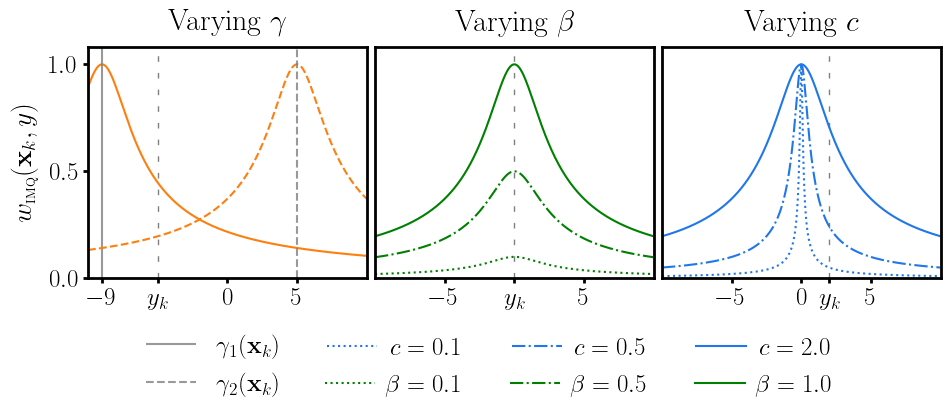

In [ ]:
plt.rc('font', family='serif', size=18)
plt.rcParams['text.usetex'] = True
matplotlib.rcParams['lines.linewidth'] = 1.5

lcolor, xcolor = "#1f77e9", "#ff7f0e"

vline_alpha=0.4
vline_wdith = 1.5
wmin, wmax=0, 1.08

fig, axs = plt.subplots(1, 3, figsize=(11,3), sharey=True)

#First plot
for offset, linestyle, sub in zip([-9., 5.], ['-', '--'], [1, 2]):
    imq_out, imq_grad_out = IMQ_and_gradient(Y=Y, m=m + tc.tensor(offset), beta=1.0, c=2.0)
    axs[0].plot(Y, imq_out, linestyle=linestyle, color=xcolor)

    if sub==1:
        label=r'$\gamma_{1}(\mathbf{x}_k)$'
    else:
        label=r'$\gamma_{2}(\mathbf{x}_k)$'

    axs[0].vlines(x=offset, ymin=wmin, ymax=wmax, linestyle=linestyle, color='gray', alpha=2*vline_alpha, linewidth=vline_wdith, label=label)
    #axs[0].scatter([-5], [0], marker='x', s=50, color='red', alpha=0.5, clip_on=False, zorder=100)
    if sub==1:
        axs[0].vlines(x=-5, ymin=wmin, ymax=wmax, color='black', alpha=0.5, linestyle=(0, (4, 8)), linewidth=1.)

    #axs[2].legend(ncols=1, fontsize=8, frameon=False)

axs[0].set_xticks([-9, -5, 0, 5])

labels = [item.get_text() for item in axs[0].get_xticklabels()]
#for i in range(len(labels)): labels[i] = ''

#labels[0] = r'$\gamma_1(\mathbf{x}_k)$'
#labels[1] = -9
#labels[2] = 0
#labels[3] = r'$\gamma_2(\mathbf{x}_k)$'
labels[1] = r'$y_k$'

axs[0].set_xticklabels(labels)
#axs[0].tick_params(bottom=False, pad=0.2)


#Second plot
for beta_val, linestyle in zip([0.1, 0.5, 1.], ['dotted', '-.', '-']):
    imq_out, imq_grad_out = IMQ_and_gradient(Y=Y, m=m, beta=beta_val, c=2.0)
    axs[1].plot(Y, imq_out, linestyle=linestyle, color="green", label=r"$\beta={}$".format(beta_val))
    #axs[2].vlines(x=0, ymin=0, ymax=1.1, color='gray', alpha=vline_alpha, linewidth=vline_wdith)
    #axs[2].scatter([5], [0], marker='x', s=50, color='black', alpha=1., clip_on=False, zorder=100)

    if beta_val==0.1:
        #axs[2].vlines(x=0, ymin=wmin, ymax=wmax, color='red', alpha=0.5, linewidth=0.7)
        axs[1].vlines(x=0, ymin=wmin, ymax=wmax, color='black', alpha=0.5, linestyle=(0, (4, 8)), linewidth=1.)



axs[1].set_xticks([-5, 0, 5])

labels = [item.get_text() for item in axs[1].get_xticklabels()]
labels[1] = r'$y_k$'
axs[1].set_xticklabels(labels)




#Third plot
for c_val, linestyle in zip([0.1, 0.5, 2.], ['dotted', '-.', '-']):
    imq_out, imq_grad_out = IMQ_and_gradient(Y=Y, m=m, beta=1, c=c_val)
    axs[2].plot(Y, imq_out, linestyle=linestyle, color=lcolor, label=r"$c={}$".format(c_val))

    if c_val==0.1:
        axs[2].vlines(x=2, ymin=wmin, ymax=wmax, color='black', alpha=0.5, linestyle=(0, (4, 8)), linewidth=1.)


axs[2].set_xticks([-5, 0, 2, 5])

labels = [item.get_text() for item in axs[2].get_xticklabels()]
labels[2] = r'$y_k$'

axs[2].set_xticklabels(labels)


for ax in axs:
    ax.set_xlim(ymin, ymax)
    ax.set_ylim(wmin, wmax)

for ax in axs.flat:
    # Set linewidth for all spines of each axis
    for spine in ax.spines.values():
        spine.set_linewidth(2.) 
    ax.tick_params(width=2.)

fig.subplots_adjust(wspace=0.03)

for ax in axs[1:]:
    ax.tick_params(left=False)


axs[0].legend(loc="upper center", bbox_to_anchor=(0.45, -0.225+0.08), ncols=1, fontsize=18, frameon=False)
axs[1].legend(loc="upper center", bbox_to_anchor=(0.72+0.01, -0.4+0.08), ncols=3, fontsize=18, frameon=False, columnspacing=1.94, handletextpad=0.4) #green
axs[2].legend(loc="upper center", bbox_to_anchor=(-0.308+0.01, -0.24+0.08), ncol=3, fontsize=18, frameon=False, handletextpad=0.5) #blue

axs[0].set_title(r"Varying $\gamma$", pad=12)
axs[1].set_title(r"Varying $\beta$", pad=12)
axs[2].set_title(r"Varying $c$", pad=12)


axs[0].set_ylabel(r"$w_{\small \textrm{IMQ}} (\mathbf{x}_k, y)$", fontsize=20, labelpad=8)
#fig.savefig("./varying-params-IMQ-weight-fct.pdf", format='pdf', bbox_inches='tight')